<center><h1> IFT-6758 : Data Science  </h1></center>
<center><h2> Fall - 2020 </h2></center> 
<center><h3> Homework - 2</h3></center> 
<center><h4> Dorsaf Sallami </h4></center> 



In [110]:
#@title Imports (Run this cell first) { run: "auto" }
plotting_library = "matplotlib"
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

# Not mandatory to use
from sklearn.utils import resample

import matplotlib.pyplot as plt

import seaborn as sns

# Uncomment this line below if using seaborn
sns.set() 

%matplotlib inline

path = 'https://raw.githubusercontent.com/Jhelum-Ch/DataScience_IFT6758/gh-pages/media/{}'

## PCA

#### **Q1**

**12 points** = $(1.5 + 2 + 2 + 1.5 + 1.5 + 2 + 1.5)$

The cell below loads a subset of the California Housing dataset.

In [129]:
housing = pd.read_csv(path.format('california_housing.csv'))

In [130]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


(a) Store only the `latitude`, `longitude` and `median_house_value` columns in a dataframe denoted by a variable `features`. Produce a scatter plot of the data points with `longitude` along x-axis, `latitude` along y-axis and the points colored by `median_house_value` i.e. higher the `median_house_value`, darker the data point in the plot.

In [131]:
features = housing.filter(['longitude' , 'latitude' ,'median_house_value'],axis=1)
features

,longitude,latitude,median_house_value
0,-114.31,34.19,66900.0
1,-114.47,34.40,80100.0
2,-114.56,33.69,85700.0
3,-114.57,33.64,73400.0
4,-114.57,33.57,65500.0
...,...,...,...
16995,-124.26,40.58,111400.0
16996,-124.27,40.69,79000.0
16997,-124.30,41.84,103600.0
16998,-124.30,41.80,85800.0


[]

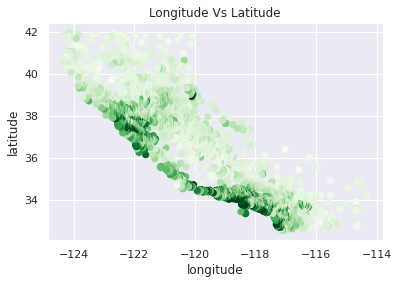

In [193]:
plt.scatter(features["longitude"], features["latitude"], c=features['median_house_value'], cmap='Greens')
plt.title('Longitude Vs Latitude' )
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.plot()

(b) Perform a PCA on the subset of the dataframe you created in (a) with only the `latitude` and `longitude` columns. Produce a scatter plot of the transformed data points with the first principal component `PC 1` along x-axis and second principal component `PC 2` along y-axis and the points colored by `median_house_value` just like in (a).

In [134]:
pca = PCA()
pc = pca.fit(features.loc[:, ['longitude','latitude']]).transform(features.loc[:, ['longitude','latitude']])

In [135]:
df_pca = pd.DataFrame(data=pc, columns=["PC1", "PC2"])

[]

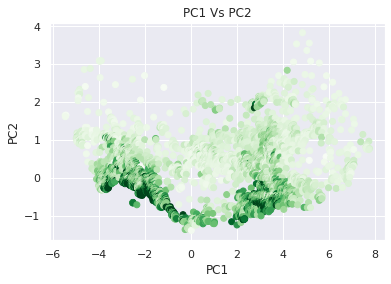

In [141]:
#plot
plt.scatter(df_pca["PC1"], df_pca["PC2"], c=features['median_house_value'], cmap='Greens')

plt.title('PC1 Vs PC2' )
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.plot()

In [167]:
pca.explained_variance_ratio_

array([0.96276223, 0.03723777])

 (c) Provide a simple interpretation for what the first principal component `PC 1` could possibly represent in the plot in (b) by comparing it with that in (a). **Justify** your answer.

The first principal component PC1 is the linear combination of x-variables (longitude and latitude) that has maximum variance (among all linear combinations) and it is strongly correlated with those variables.

The first direction in PCA find the best dimensional linear approximation.



In [153]:
np.corrcoef(df_pca["PC1"], features['longitude'])

array([[ 1.        , -0.97851277],
       [-0.97851277,  1.        ]])

In [154]:
np.corrcoef(df_pca["PC1"], features['latitude'])

array([[1.        , 0.98356747],
       [0.98356747, 1.        ]])

(d) Repeat what you did in (b) above by setting the `whiten` parameter as `True` in the `PCA()` constructor and producing the plot. What difference do you observe? What do you think `whiten` does specifically in this problem?

In [155]:
pca2 = PCA(whiten=True)
pc2 = pca2.fit(features.loc[:, ['longitude','latitude']]).transform(features.loc[:, ['longitude','latitude']])

In [156]:
df_pca2 = pd.DataFrame(data=pc2, columns=["PC1_2", "PC2_2"])

[]

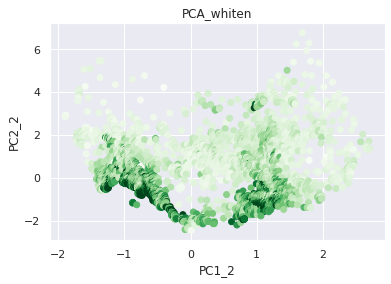

In [158]:
plt.scatter(df_pca2["PC1_2"], df_pca2["PC2_2"], c=features['median_house_value'], cmap='Greens')

plt.title('PCA_whiten' )
plt.xlabel('PC1_2')
plt.ylabel('PC2_2')
plt.plot()

In [166]:
pca2.explained_variance_ratio_

array([0.96276223, 0.03723777])

I notice a variation in the x_axis and the y_axis. This is due to the whiten parameter. With this parameter the components_ vectors are multiplied by the square root of n_samples and then divided by the singular values. 
In this problem, whitening will help us to get less correlated features with each other and all have the same variance.

(e) Perform a PCA on the entire dataframe `features` with `whiten` set to `True` and produce a scatter plot of the transformed data points with the first principal component `PC 1` along x-axis and second principal component `PC 2` along y-axis and the points colored by `median_house_value` just like in (a). 

In [159]:
pca3 = PCA(whiten=True)
pc3 = pca3.fit(features).transform(features)

In [160]:
df_pca3 = pd.DataFrame(data=pc3, columns=["PC1_3", "PC2_3", 'PC3_3'])

[]

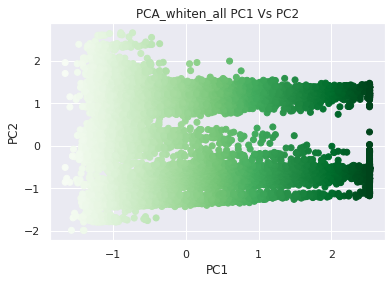

In [194]:
plt.scatter(df_pca3["PC1_3"], df_pca3["PC2_3"], c=features['median_house_value'],cmap='Greens')

plt.title('PCA_whiten_all PC1 Vs PC2' )
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.plot()

(f) Observe how the color indicating `median_house_value` varies in the plot you produced in (e). Is the variation of `median_house_value` depicted in this plot simpler than what is indicated by all the above plots? Provide an **explanation** for why it is (or) it is not the case.

In [165]:
pca3.explained_variance_ratio_

array([9.99999999e-01, 6.12697795e-10, 1.80407230e-11])

The color indicating median_house_value seams varies with the PC1: higher the value of the PC1 higher the darker color, i.e higher the median_house_value.
the variation of median_house_value depicted in this plot simpler than what is indicated by all the above plots because using the entire features dataframe, The first Principle component PC1 becomes more capable of presenting the variation on the data which makes the interpretability of the median_house_value much more easier , as it varies corresponding to the PC1.

 (g) The California Department of Housing and Community Development (HCD) releases additional information about the data samples you used  here, by providing an `price_index` tag that can take values `high`, `middle` or `low` based `median_house_value`. If you were to eventually use the principal components you produced in (e), which one(s) among the `PC 1`, `PC 2`, ..,. would you use to classify the data samples into these three categories (`high`, `middle` and `low`)? Concretely **justify** your choice.

The first principle component captures the most information (explained_variance_ratio_ ) from the features dataframe and as we discussed in the previous question
median_house_value varies with PC1.
Using the plot in the previous question, we can classify the data samples as:

*     PC1 <0 :  low price_index 
*     0< PC1 <1 :  middle price_index
*     PC1 >1 : high price_index

**Bonus : (3 points)**
> (h) In the plot that you observe in (a), you will remark two major clusters that are the *darkest*. Let us identify the cluster with the higher value of `latitude` as the `SF cluster` and the one with the lower value of `latitude` as the `LA cluster`. Verify programmatically if this clustering is preserved or distorted in the plot in (e). What does this tell you about what is represented by the second principal component `PC 2` produced in (e)?

Text(0.5, 1.0, 'Latitude distribution')

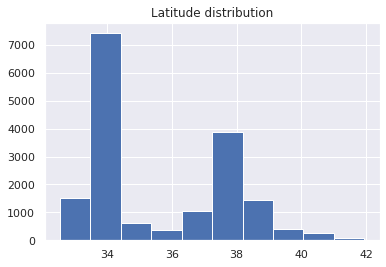

In [169]:
plt.hist(features['latitude'])
plt.title('Latitude distribution')

(array([6.000e+01, 5.040e+02, 5.109e+03, 7.613e+03, 2.812e+03, 6.510e+02,
        1.530e+02, 8.100e+01, 1.300e+01, 4.000e+00]),
 array([-3.67809783, -2.60128903, -1.52448023, -0.44767143,  0.62913737,
         1.70594617,  2.78275497,  3.85956377,  4.93637257,  6.01318137,
         7.08999017]),
 <a list of 10 Patch objects>)

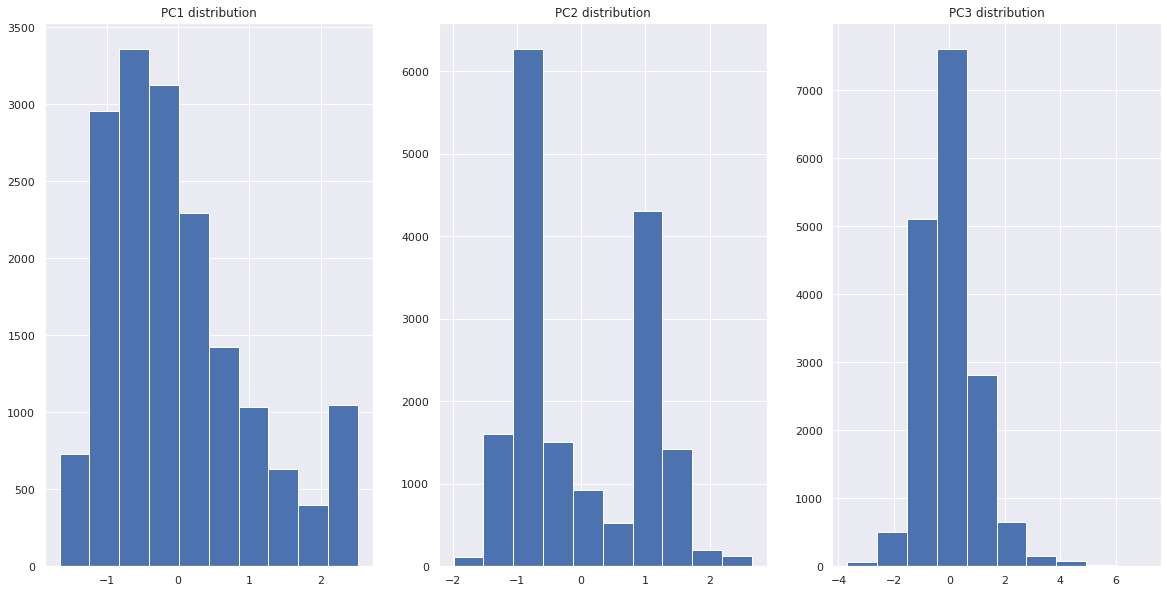

In [171]:
fig, ax = plt.subplots(nrows=1, ncols=2 ,figsize=(20,10))

ax1=plt.subplot(1, 3, 1)
ax1.set_title('PC1 distribution')
ax1.hist(df_pca3["PC1_3"])

ax2=plt.subplot(1, 3, 2)
ax2.set_title('PC2 distribution')
ax2.hist(df_pca3["PC2_3"])

ax3=plt.subplot(1, 3, 3)
ax3.set_title('PC3 distribution')
ax3.hist(df_pca3["PC3_3"])

Comparing the three plots of different PCA components to the latitude histogram, it is clear that  the clustering is preserved.

PC2 have the same distribution shape as the latitude distribution but in different scaling. PC2 is orthogonal to PC1.

## Clustering

#### **Q2**

**10 points** = $(1 + 2 + 3 + 1.5 + 1.5 + 2)$

A bird detection system that is equipped with multiple sensors is deployed in an observation station in an open space and it detects and collects some information about birds that visit the space. For each detected bird, it is able to collect the following information: 

*   `position` - a value of the form (`x`,`y`,`z`) which indicates the coordinates in a three-dimensional space defined by the LiDAR field of the system. `x` and `y` coordinates are in the range (-500,500) whereas `z` coordinate is in the range (0,150) where 0 indicates the ground level for `z`.
*   `sound_level` - a value in decibels (0-120 dB) of the sound made by the detected bird with 0 indicating no audible sound and 120 indicating maximum sound that can be detected. 
*   `time_of_visit` -  a value indicating number of milliseconds since the 00:00 hours of the day of collection.

The system sends out a table with the above three fields periodically to you. You are leading a team of data scientists to explore if the data collected by this system can be used to distinguish the different species of birds visiting the station located in the open space.  

(a) You decide that using clustering for initially attempting this problem is a good option. How would you *logically* convince your team of this? 

First of all, we need to use an unsupervised machine learning algorithm because eventually we don't have the specie (label) for each bird in the dataset. Among these algorithms, Clustering matchs  to this problem beacuse it mainly split the dataset into groups based on their similarities (distinguish the different species).

(b) Your team is trying to decide between using K-means and hierarchical clustering, both based on an Euclidean distance measure. Propose a list of preprocessing operations to be performed on the before you use any clustering algorithm on the raw dataset. **Justify** why you include each step. 

The list of preprocessing operations can contains:



*   **Data scaling**: Here the features have different value ranges then the model will treat them differently for that we need to scale the data within a particular range. It helps in speeding up the calculations in an algorithm.

*   **Data normalization**: We need data normalization because distance calculation weights each dimension equally and hence care must be taken to ensure that unit of dimension shouldn’t distort relative near-ness of observations. 


*   **Handling missing values**: Missing values can lead to poorly performance. If there are only few observations with missing values then these observations can be excluded from clustering. However, this must have equivalent rule during scoring about how to deal with missing values. A better practice is to impute missing observations.


*   For time_of_visit feature , we can add features like minute and hour by converting the number of milliseconds also add  day in a week, in a month, on the year and so on and so forth depending on the period we get from the system.
*   Depending on position feature, we can add zone features: split the space into regions , then the birds with positions in the same zone are likely to be in the same specie.

(c) An enthusiastic intern in your team selects a subset of *raw* data samples from the dataset, selecting some nocturnal birds that visit all together exactly at midnight everyday and they cannot produce any sound. They all have been observed to consistently sit on the ground along a straight line. He generates the following dendrogram (left) using an agglomerative hierarchical clustering with an appropriate linkage that maximizes intercluster dissimilarity. On the right is a top-view visualization of the arrangement of the birds in the station, based on the dendrogram. The bird B1 has already been placed. Place the birds B2 - B9 on the line with an *appropriate* spacing between them. **Explain** your choice.

<br/>
<br/>

<img width=750 src="https://i.ibb.co/M2ymGvm/nocturnal-birds.png" alt="Nocturnal Birds" border="0" /> 


<a href="https://ibb.co/LdW3tK0"><img src="https://i.ibb.co/m5w3qpR/clustering.png" alt="clustering" border="0"></a>

In the dendrogram, the horizontal axis represents the clusters. The vertical scale represent the distance or dissimilarity. The higher the height of the fusion, the less similar the objects are. We have:

*   **cluster1** ={B1,B2,B3,B4}
    * cluster11={B1}
    * cluster12={B2,B3,B4}
        * cluster121={B2}
        * cluster122={B3,B4}


*   **cluster2** = {B5,B6,B7,B8,B9}
    * cluster21={B8}
    * cluster22={B5,B6,B7,B9}
        * cluster221={B5}
        * cluster222={B6,B7,B9}
                * cluster2221={B6}
                * cluster2222={B7,B9}

Here, we can notice that cluster2222({B7,B9}) is very dissimilar(more distance) to the cluster1, same for the cluster122 to the cluster2.
If we split the line into 2 sublines: the first part dedicates to cluster 1 and the second to the cluster 2.</br>
Also, cluster122={B3,B4} is more close to cluster121={B2} than the cluster cluster11={B1}. Same for cluster2222={B7,B9} is close to cluster2221={B6} and 
cluster222={B6,B7,B9} close to cluster221={B5} and so on..


(d)  You are informed by a group of expert ornitholigists that groups of birds that belong to different species, tend to visit the station in almost equal numbers per species. Based on this information, what type of linkage would you use in the hierarchical clustering algorithm? **Justify** your choice.

From the fact that groups of birds that belong to different species, tend to visit the station in almost equal numbers per species, we can understand that the clusters have same size.
Based on [A COMPARISON OF HIERARCHICAL METHODS FOR CLUSTERING FUNCTIONAL
DATA](https://people.stat.sc.edu/Hitchcock/compare_hier_fda.pdf)
 For clusters of equal sizes, Ward’s method and complete linkage
worked best.As we didn't see Ward’s method in class,  complete linkage will work well.

(e) The group of ornithologists have identified that exactly 10 species of birds visit the station. Does this information help you decide between choosing the K-means and hierarchical clustering algorithms? **Explain** why/why not.


Once we have the number of clusters, K-Means is useful . Its main benefit is its speed. K-Means clustering is a fast compared by hierarchical clustering which requires the computation and storage of an n×n  distance matrix. For very large datasets, this can be expensive and slow.

However, it is important to keep in mind that K-Means clustering may not perform well if there is variations in density, non spherical shapes of clusters or if the data is noisy or full of outliers.


(f) Briefly outline any **two** ways in which you can verify if the clustering you have performed has captured the natural grouping that exists among the actual data samples.

To validate clustering algorithm, we have two approaches: **Internal** clustering validation (evaluate the results of a clustering algorithm using information that involves the vectors of the datasets themselves) Vs **External** clustering validation(evaluate the results of a clustering algorithm based on external information that is not contained in the dataset). Since we want to verify if the clustering has captured the natural grouping that exists among the actual data samples,i.e compared by real clustering, we can evalute it by:


*   **Purity**: is a measure of the extent to which clusters contain a single class.
*   **Rand index**: computes how similar the clusters (returned by the clustering algorithm) are to the benchmark classifications.

Based on [Internal versus External cluster validation
indexes](http://www.universitypress.org.uk/journals/cc/20-463.pdf)



## Cross Validation

#### **Q3**

**10 points** = $(1 + 2 + 3 + 1.5 + 1 + 1.5)              $




Given below is a pair of plots generated while cross-validating a K-NN model trained on a dataset with various values of K using 12-fold CV and Leave-one-out (LOOCV) methods :                             

<img width=750 src="https://i.ibb.co/cyY7m6X/cv-graphs.png" alt="Trees" border="0" /> 

Answer the following questions:



 

   



(a) What is the motivation behind using cross-validation techniques such as LOOCV and k-fold CV over having a validation set?

Cross Validation techniques are very useful  for assessing the performance of the model, particularly in cases where you need to mitigate overfitting. It is also of use in determining the **hyper parameters** of the model by doing cross-validation for many possible values of a parameter and choosing the parameter value that gives the lowest cross-validation average error.


(b) What could possibly explain the difference in the error curves in the two methods in the plots?

The difference in the error curves can be explained by the difference between the two methods. In fact, k-fold CV involves randomly dividing the data into k  equal folds. Each of these folds is treated as a validation set in k different iterations. whereas LOOCV is a special case of k-fold cross-validation with k = n , for a sample of size n. Thus, LOOCV is the most computationally intense method since the model must be fit n times. Also, **LOOCV has higher variance, but lower bias, than k-fold CV**, as it uses more information in the training sets. In k-fold the outputs are not very correlated as the training sets can be quite different, hence less variance.

(c) Describe how similar (or) different the error curves generated on the same dataset would look like for another independent run of **each of** the methods *12-fold* and *LOOCV*, compared to the plots above. **Explain** the reason for your answer in each case. 



*   **12-Fold Cross-Validation**: for another independent run, we can get a different split of the dataset into 12-folds, consequently, the distribution of performance scores can be different, resulting in a different mean estimate of model performance.Therefore we get **different**  error curve.

*   **LOOCV**: each observation by itself plays the role of the validation set, therefore, we will have the same folds for another independent run. consequently,   **same**  error curve.



(d) Under which circumstances would you would favour using LOOCV over k-fold CV?

LOOCV is better when we have a **small set of training data**. In this case, you can't really make many folds to make predictions and using the rest of your data to train the model.


(e) Based on the above plots, what is the best value for the hyperparameter K of the model? **Explain why.** 

Based on the above plots, the best value for the hyperparameter K of the model is **5** where the minimum error was achieved clearly in 12-fold CV  and the curve is smoother for LOOCV method.



(f) What type of hyperparameter search do the above plots illustrate? **Explain**.


 The above plots illustrate **Grid search** because  we can see a parameter sweep, i.e trying a exhaustive search in a subset  [1,2,3,4,5,6,7,8,9,10,11,12]  of the hyperparameter space of the model.

## Inference and Bootstrapping

#### **Q4**

**16 points** = $(1.5 + 1.5 + 1.5 + 1.5 + 2 + 2 + 1.5 + 1.5 + 1.5 + 1.5)$

The dataset loaded in the next cell consists of data from a drug trial experiment.  
* `subject_type` indicates 0 for if a subject is a *control* and 1 if taking *treatment*. 
* `daily_dosage` indicates the dosage of the drug in millilitres (mL)
* `life_expectancy` show the projected age (year) upto which that the subject is expected to live.

Let the field `subject_type` in the dataset correspond to $x_{type}$, `daily_dosage` to $x_{dosage}$ and `life_expectancy` to $y$.



  




In [172]:
trials = pd.read_csv(path.format('drug-trials.csv'))

In [173]:
trials.info

<bound method DataFrame.info of     subject_type  daily_dosage  life_expectancy
0              0        22.762         63.39666
1              0        22.762         80.14504
2              1        16.036         82.31560
3              1        23.830         84.20141
4              0         3.073         57.28034
..           ...           ...              ...
95             0         9.810         61.10442
96             1        18.397         82.50143
97             1         8.957         60.48089
98             1        15.638         83.88869
99             1        25.868         83.70467

[100 rows x 3 columns]>

  (a) Now, consider the regression : 
  $$y = \beta_{dosage} x_{dosage} + \beta_{type} x_{type} + \beta_{0} + \epsilon$$

  Write your code to perform this regression and list the coefficient estimates $\hat{\beta}_{dosage}$, $\hat{\beta}_{type}$ and $\hat{\beta}_{0}$ that you obtained by running your code.

In [174]:
X = trials.loc[:,['subject_type','daily_dosage']]
Y = trials['life_expectancy']
regressor = LinearRegression()
regressor.fit(X,Y)
bias = regressor.intercept_
weights = regressor.coef_ 

print(f"beta_type = {weights[0]} ")
print(f"beta_dosage = {weights[1]} ")
print(f"beat_0 (Bias) = {bias}")

beta_type = 5.668116800500298 
beta_dosage = 0.27154927305417353 
beat_0 (Bias) = 65.67943220081068


(b) Run a bootstrap of the dataset over 500 iterations, and collect the coefficients $\hat{\beta}_{dosage}$, $\hat{\beta}_{type}$ and $\hat{\beta}_{0}$ that you obtain in each iteration. 

In [175]:
# Bootstrap configuration
num_iterations = 500
num_samples = len(trials.loc[:,['subject_type','daily_dosage']])

beta_types = []
beta_dosages = []
biases = []

# Run the bootstrap
for i in range(num_iterations):
  train = resample(trials.values, n_samples=num_samples)
  regressor = LinearRegression()
  regressor.fit(train[:,:-1], train[:,-1])

  bias = regressor.intercept_
  biases.append(bias)

  weights = regressor.coef_
  beta_types.append(weights[0])
  beta_dosages.append(weights[1])


print(f"beta_type = {beta_types} ")
print(f"beta_dosage = {beta_dosages} ")
print(f"beat_0 (Bias) =  {biases}")


beta_type = [4.707304206016675, 4.04017003449062, 4.792116880750885, 5.976654894583258, 5.862453764345406, 7.635062809014754, 5.46437046759361, 5.546715762795241, 6.135806234237999, 3.1093949518620145, 8.001955166334414, 6.2165194223530005, 3.8679961320862257, 3.1694749303999856, 5.095597585626018, 5.652420577859997, 5.601814213299413, 5.607829568537905, 6.300305765459289, 7.057298249015237, 6.684367329534944, 4.9987228035748315, 4.539768731958882, 5.924469039971385, 5.813783447736378, 3.7217568327212494, 4.776327567713317, 4.1923458743032915, 7.582780618967986, 5.535537278014174, 4.530352158448309, 8.115279957658665, 6.93635390718621, 2.852201625187053, 5.955422934074946, 7.0026885240199945, 4.354059897901662, 8.210054674345724, 6.093667657068231, 6.363645814927415, 5.986529722510579, 8.09685375342237, 4.7926433495448695, 6.8837027100197865, 6.2399959040248385, 6.554657518166852, 4.081214091129399, 4.944907823951637, 3.0792593079916974, 6.071812828930983, 6.740704646739614, 6.05955551

  (c) Use the coefficient estimates that you collected in (b) and estimate the standard errors of all the 3 coefficients $S.E.(\hat{\beta}_{dosage})$, $S.E.(\hat{\beta}_{type})$ and $S.E.(\hat{\beta}_{0})$.

In [176]:
def StandardError(array):
  return np.std(array, ddof=1)/np.sqrt(len(array))

In [177]:
SE_beta_dossage = StandardError(np.array(beta_dosages))
SE_beta_type = StandardError(np.array(beta_types))
SE_bias = StandardError(np.array(biases))

print(f"Srandard error of beta_types  : {SE_beta_type}")
print(f"Srandard error of beta_dosage  : {SE_beta_dossage}")
print(f"Srandard error of Bias : {SE_bias}")

Srandard error of beta_types  : 0.08095493375395918
Srandard error of beta_dosage  : 0.005196811325869878
Srandard error of Bias : 0.10643274128604334


  (d) Plot a histogram to observe the distribution of each of the collected coefficient estimates. What do you observe?

(array([  5.,  14.,  42.,  79., 102., 111.,  86.,  39.,  15.,   7.]),
 array([58.8574739 , 60.21690844, 61.57634297, 62.93577751, 64.29521205,
        65.65464659, 67.01408113, 68.37351566, 69.7329502 , 71.09238474,
        72.45181928]),
 <a list of 10 Patch objects>)

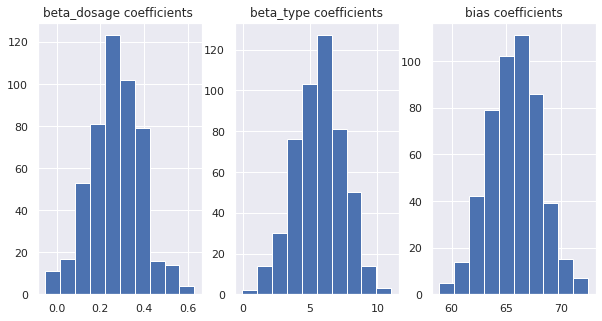

In [178]:
fig, ax = plt.subplots(nrows=1, ncols=2 ,figsize=(10,5))

ax1=plt.subplot(1, 3, 1)
ax1.set_title('beta_dosage coefficients ')
ax1.hist(beta_dosages)

ax2=plt.subplot(1, 3, 2)
ax2.set_title('beta_type coefficients')
ax2.hist(beta_types)

ax3=plt.subplot(1, 3, 3)
ax3.set_title('bias coefficients')
ax3.hist(biases)

We notice that the coefficients follow the **Student t distribution**.

  (e) Provide a 95% confidence interval for each of the coefficient estimates. What does this interval mean?

In [179]:
# Confidence interval
confidence_percentage = 95
# p-values
p = (100-confidence_percentage)/2 

# Quartiles
lower_beta_type = max(0.0, np.percentile(beta_types, p))
upper_beta_type = min(1.0, np.percentile(beta_types, 100 - p))

lower_beta_dosage = max(0.0, np.percentile(beta_dosages, p))
upper_beta_dosage = min(1.0, np.percentile(beta_dosages, 100 - p))

lower_bias = max(0.0, np.percentile(biases, p))
upper_bias = min(1.0, np.percentile(biases, 100 - p))


print('beta_type : ({:d}%) confidence interval = [{:.1f}%,{:.1f}%]'.format(int(confidence_percentage), lower_beta_type*100, upper_beta_type*100))
print('beta_dosage : ({:d}%) confidence interval = [{:.1f}%,{:.1f}%]'.format(int(confidence_percentage), lower_beta_dosage*100, upper_beta_dosage*100))
print('bias : ({:d}%) confidence interval = [{:.1f}%,{:.1f}%]'.format(int(confidence_percentage), lower_bias*100, upper_bias*100))


beta_type : (95%) confidence interval = [205.1%,100.0%]
beta_dosage : (95%) confidence interval = [2.3%,51.2%]
bias : (95%) confidence interval = [6090.5%,100.0%]


The 95% confidence interval is a range of values, for each coefficient, that you can be 95% sure contains the true coefficient lies in. In other words,  it is a set of values for which a hypothesis test  cannot be rejected.


  (f) Generate the scatterplot for the points in the dataset with `daily_dosage` on the x-axis, `life_expectancy` on the y-axis and the points colored by the `subject_type` value (separate colors to indicate the types 0 and 1) with the collected 500 bootstrap sampled fits overlaid. To make the plot easier to read, reduce the transparency of the lines.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'life expectancy')

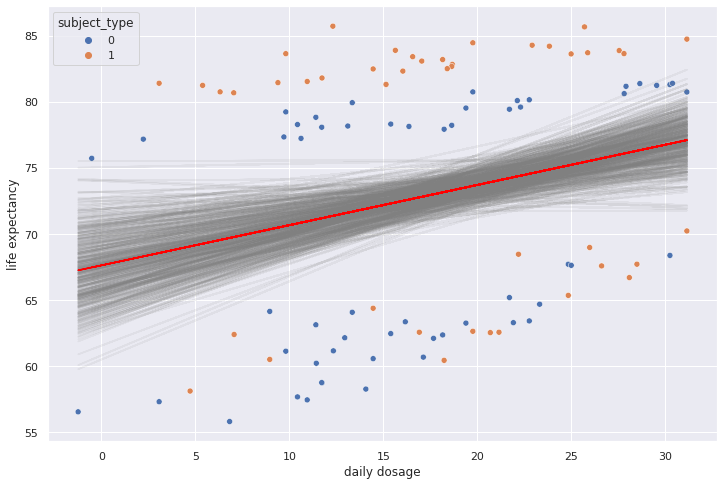

In [180]:
num_iterations = 500

X = trials['daily_dosage'].values
y =  trials['life_expectancy'].values

# Reshape X to prepare it for regression
X = X.reshape(-1,1)

plt.figure(figsize=(12,8))


# Bootstrapping loop
for i in range(0, num_iterations):
 
    sampled_index = np.random.choice(range(0, len(y)), len(y))

    X_samples = X[sampled_index]
    y_samples = y[sampled_index]    

    lr = LinearRegression()
    lr.fit(X_samples, y_samples)
    plt.plot(X, lr.predict(X), color='grey', alpha=0.1, zorder=1)

# Plot the data points
sns.scatterplot(X.reshape(1,-1)[0],y,hue=trials["subject_type"])

# Fit Regression model for the entre data
lr = LinearRegression()
lr.fit(X, y)
plt.plot(X, lr.predict(X), color='red', zorder=5)
plt.xlabel("daily dosage")
plt.ylabel("life expectancy")

  (g) Based on all the above, **explain** intuitively what is conveyed by the plot you generated in (f).

To get this plot, we perfomrmed Bootstrapping. It refers to resample the data with replacement. That is, instead of fitting the model to the original X and y, we fit the model to resampled versions of X and y for multiple times. Thus, we get slightly different models which you can use to create a confidence interval. The plot  is a visual example of such an interval.

  (h) Make a scatterplot of the bootstrapped coefficients, $\left(\beta_{type}^{\ast}, \beta_{dosage}^{\ast}\right)$ against one another. **Comment** on the overall distribution of these two coefficients **and** the nature of correlation between them.

Text(0, 0.5, 'beta_dosages')

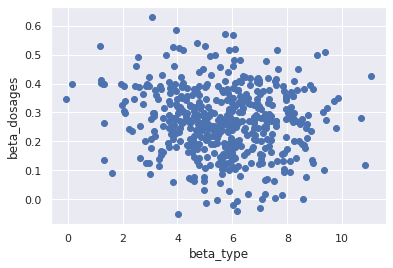

In [181]:
plt.scatter(beta_types,beta_dosages)
plt.xlabel("beta_type")
plt.ylabel("beta_dosages")

In the plots above, for a given value of X (say X = 6 in the second plot), the corresponding values of Y range all over the place from y = 0.2 to y = 0.4. Also, we are  unable to draw a line of best fit because there is no pattern. The lack of predictablility in determining y from a given value of X, and the shape of the scatter plot leads to the conclusion: **no relationship between them**.


In [182]:
r = np.corrcoef(beta_dosages, beta_types)
print('Correlation: \n')
print(r)

Correlation: 

[[ 1.         -0.11464044]
 [-0.11464044  1.        ]]


The correlation coefficients are very close to zero, this explaine the scatter plots above and indicates that there is very weak correlation between the two variables.

  (i) Similar to above, estimate the coefficient estimates $\hat{\beta}_{dosage}$ and $\hat{\beta}_{0}$ and the standard error of the dosage coefficient $S.E.(\hat{\beta}_{dosage})$ by bootstrapping the dataset over 500 iterations and fitting the dataset in the regression : 
  $$y = \beta_{dosage} x_{dosage} + \beta_{0} + \epsilon$$

In [183]:
# Bootstrap configuration
num_iterations = 500
num_samples = len(trials)


beta_dosages2 = []
biases2 = []

# Run the bootstrap
for i in range(num_iterations):
  train = resample(trials.drop("subject_type",axis=1).values, n_samples=num_samples)
  regressor = LinearRegression()
  regressor.fit(train[:,:-1], train[:,-1])

  bias = regressor.intercept_
  biases2.append(bias)

  weights = regressor.coef_
  beta_dosages2.append(weights[0])


print(f"beta_dosage 2 = {beta_dosages2} ")
print(f"beat_0 (Bias) 2 =  {biases2}")


beta_dosage 2 = [0.37943559851899894, 0.27979531203450053, 0.37514718165594585, 0.31176786489376773, 0.14988035717206888, 0.34380447660372926, 0.360665083477249, 0.5290474497833297, 0.18608611193092373, 0.24608805462595743, 0.17246448041647286, 0.3828505096091876, 0.4001288215581956, 0.1206559308393569, 0.31101491617338145, 0.19654878504718243, 0.21419132899634205, 0.3848641678103334, 0.4185760492053852, 0.4179062582788858, 0.5344614043582678, 0.31297319618792996, 0.0988342791075467, 0.5176212346274778, 0.46549215330363797, 0.5671343095984352, 0.35336852552443576, 0.3280032772961078, 0.03632293473394607, 0.0751647836341513, 0.35919212171637666, 0.2687190236580528, 0.2628727858888659, 0.24031085958042483, 0.33471252424627057, 0.21960368455222834, 0.34786953106067964, 0.34638841458691266, 0.27622359931641643, 0.1682854780853016, 0.26963083904030477, 0.3144259877392286, 0.24782202108910883, 0.4017810870636209, 0.4838859741961217, 0.34139425660690303, 0.3910347581723349, 0.2677984856648046

In [184]:
SE_beta_dossage2 = StandardError(np.array(beta_dosages2))
SE_bias2 = StandardError(np.array(biases2))

print(f"Srandard error of beta_dosage 2 : {SE_beta_dossage2}")
print(f"Srandard error of Bias 2 : {SE_bias2}")

Srandard error of beta_dosage 2 : 0.0047947913501861505
Srandard error of Bias 2 : 0.10033564021861756



  (j) Comparing the results in (i) and (c), what can you comment about the relationship of `daily_dosage` and `subject_type` with `life_expectancy`? 

There is a difference between the two reults(in c and i): the standard error of beta dosage increased. From this interpretation, we can notice that `subject_type`   is a **confounding variable** because a causal relationship between this two variables is often described as the way in which the independent variable affects the dependent variable. 

**Bonus : **
> (k) In a bootstrap of the dataset over 500 iterations similar to the above, perform an independent t-test with an $\alpha=0.05$ significance level, using `scipy.stats.ttest_ind` on the `life_expectancy` of these two groups . Collect the p-values and plot the p-value histogram. 

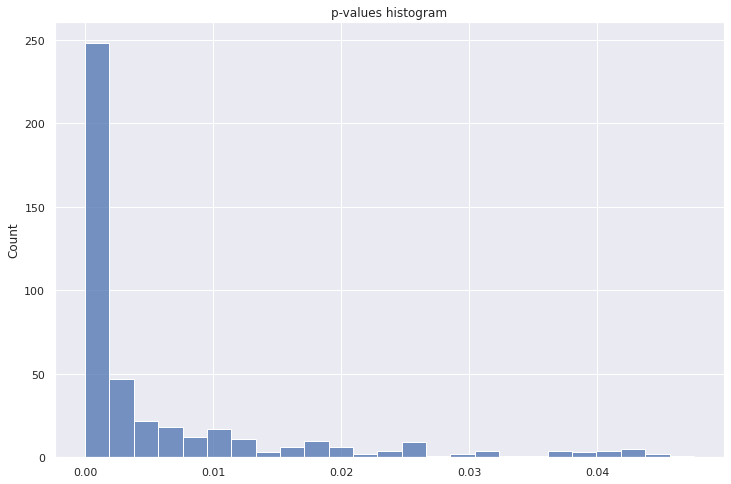

In [185]:
from scipy import stats

num_iterations=500
num_samples=len(trials)
alpha = 0.05
p_values=[]

for i in range(num_iterations):
  train = resample(trials.values, n_samples=num_samples)

  life_expectancy_1 = train[train[:,0]==1][:,-1]
  life_expectancy_0 = train[train[:,0]==0][:,-1]

  p_value = stats.ttest_ind(life_expectancy_1, life_expectancy_0)[1]
  if p_value <= alpha:
    p_values.append(p_value)

plt.figure(figsize=(12,8))
plt.title('p-values histogram')
sns.histplot(p_values)

## Feature Engineering

#### **Q5**

**4 points** = $(1.5 + 2.5)$                

Given below is a cell that loads a dataset that contains features representing the body measurements of certain types of sharks in various regions in Canada.

Using programming, perform analyses using the following methods to identify the outlier samples in the dataset : 

  

 


In [186]:
sharks = pd.read_csv(path.format('ca-sharks.csv'))

In [187]:
sharks

,id,region,fin_length,body_length,tail_length
0,1,QC,54.20,480.8800,3.727446
1,2,QC,60.20,514.8664,3.853217
2,3,QC,65.10,561.3359,3.839753
3,4,QC,69.80,532.7045,3.866420
4,5,QC,77.00,613.4460,3.821723
...,...,...,...,...,...
154,155,AB,14.62,168.3384,2.192090
155,156,AB,14.84,153.5110,2.299586
156,157,AB,15.02,151.9402,2.233611
157,158,AB,17.17,248.4968,2.352828


In [188]:
sharks.info

<bound method DataFrame.info of       id region  fin_length  body_length  tail_length
0      1     QC       54.20     480.8800     3.727446
1      2     QC       60.20     514.8664     3.853217
2      3     QC       65.10     561.3359     3.839753
3      4     QC       69.80     532.7045     3.866420
4      5     QC       77.00     613.4460     3.821723
..   ...    ...         ...          ...          ...
154  155     AB       14.62     168.3384     2.192090
155  156     AB       14.84     153.5110     2.299586
156  157     AB       15.02     151.9402     2.233611
157  158     AB       17.17     248.4968     2.352828
158  159     AB       18.19     226.1248     2.329651

[159 rows x 5 columns]>

(a) For each *feature* among `body_length`, `fin_length` and `tail_length` in the dataset, use a box plot to visualize the feature values (along y-axis) grouped by `region` feature (show on x-axis). Identify the `region` and `feature` (other than `region`) that shows the highest number of outliers. 

Text(0.5, 1.0, 'Body length boxplot')

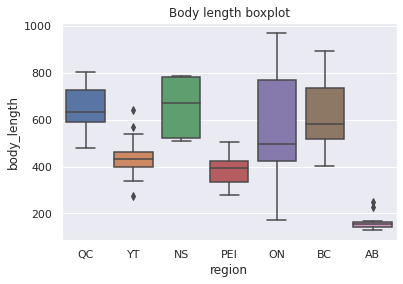

In [189]:
sns.boxplot(x="region",y='body_length',data=sharks)
plt.title('Body length boxplot')

Text(0.5, 1.0, 'Fin length boxplot')

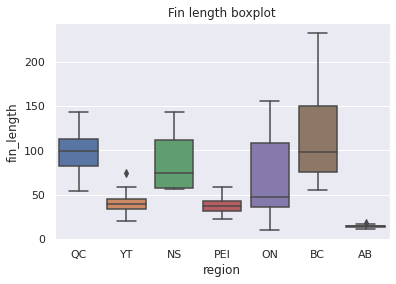

In [190]:
sns.boxplot(x="region",y='fin_length',data=sharks)
plt.title('Fin length boxplot')

Text(0.5, 1.0, 'Tail length boxplot')

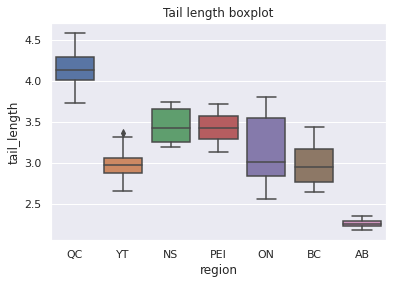

In [191]:
sns.boxplot(x="region",y='tail_length',data=sharks)
plt.title('Tail length boxplot')

Box plot is useful because it shows outliers within a data set:  an outlier is defined by a data point that is located outside the whiskers of the box plot. So, in our cases:


*   Body length boxplot: here we get three outliers in the region YT and two in the region AB.
*   Fin length boxplot: here we get one outlier in the region YT and another one in the region AB.


*   Tail length boxplot: here we get one outlier in the region YT.



Conclusion:  the region **YT** and the feature **body_length** show the highest number of outliers.


 (b) For the `region` and the `feature` you chose in (a), use the Q3-Q1 Inter-Quartile Range (IQR) to identify and list the rows of the outliers from the dataframe. 

In [192]:
YTsharks = sharks[sharks['region'] == 'YT']
Q1 = YTsharks['body_length'].quantile(0.25)
Q3 = YTsharks['body_length'].quantile(0.75)
IQR = Q3-Q1
outliers= (YTsharks['body_length'] < Q1-1.5*IQR) | (YTsharks['body_length'] > Q3+1.5*IQR)
sharks.loc[YTsharks['body_length'][outliers].index]

,id,region,fin_length,body_length,tail_length
35,36,YT,20.2,272.3920,2.653751
53,54,YT,57.8,570.5584,3.253912
54,55,YT,74.0,639.7450,3.365487


#### **Q6**

**8 points** = $(1 + 3 + 2 + 2 )$                

For the questions below, answer briefly by inspecting the dataset below. (There is no need to use any programming) :

This is a representative subset of a collected dataset with information about used buses across three Canadian cities. A model needs to be fit to predict the selling price `Price($)` of a bus. `--` indicates that the information is not available. 

ID|City|Province|Vehicle model|Category|Mileage(kmpl)|Certification|Year|Num_Damages|Price($) 
--|--|--|--|--|--|--|--|--|--|
1|Montréal|QC|CX-120|School|2.5|Certified|2018|3|44900
2|Vancouver|BC|AL-100|Tourism|5|Not certified|2016|--|22380
3|Toronto|ON|WS-978|Tourism|--|Certified|--|--|30000
4|Vancouver|BC|RR8|Factory|1.5|Certified|2012|5|10500
5|Toronto|ON|GH-50|Factory|4.5|Not certified|2015|--|12000
6|Montréal|QC|--|School|--|Not certified|2010|--|8000










(a) List the features that you would remove from the dataset before using it for model fitting. Give valid **reasons** for your answer.



*   The ID feature  is just a number (sequence of numbers) with no meagninful information that can help the model to predict the price. So, we remove it.
*    province and city features describe the same information (location), so we must remove the redundant features. Since a city is a part of a province we keep city feature (more specific) for more precision.



(b) List the features that need to be encoded in this dataset and outline which encoding schemes your would use in each case. Give valid **reasons** for your answer.



*   *Category* and *City*: **One Hot Encoding** becaue the feature is  nominal(do not have any order). Each city is mapped with a binary variable containing either 0 or 1. Here, 0 represents the absence, and 1 represents the presence of that city.


*   *Certification*: **Binary encoding**
 Certification feature is a binary feature so we cant just replace: 0 = Not certified' and 1 = Certified.

*   *Vehicle model*: **Target Mean Encoding** because we have many unique value for the vehicle model we can not perform One Hot Encoding because it will increase the number of features





(c) What type of an imputation scheme would make sense for the missing values in each of the fields `Year` and `Mileage`? Give valid **reasons** for your answer.



*   ListYear: It is a time serie problem,  data with trend without seasonality. Therfore we need to perform Linear Interpolation. 
*   Mileage: It is problem for continuous data. We can use Mean or a predictive mode(ex: linear regression without using the predictor(Price)).



(d) You propose to use the simplest sparsity-based method to select the best features among those given in the dataset. In just two lines, describe the high-level procedure to do this.

 The LASSO technique sets a constraint on the sum of the absolute values of the model parameters, the sum has to be less than a fixed value by reducing  some of the coefficients of the regression  to zero. During features selection process the variables that  have a non-zero coefficient after the shrinking process are selected to be part of the model. 